In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from src.pokemon import PokemonFactory, StatusEffect
from src.catching import attempt_catch

In [31]:
def simulate_catch(pokemon, pokeball, status, level):
    
    success, capture_rate = attempt_catch(pokemon, pokeball)
    
    data = {
        "success": success,
        "capture_rate": capture_rate,
        "max_hp": pokemon.max_hp,
        "curr_hp": pokemon.current_hp,
        "pokeball": pokeball,
        "status": status.value[0],
        "level": level
    }
    
    return pd.DataFrame([data])

In [32]:
with open("ejercicio2c-config.json", "r") as file:
    config = json.load(file)

POKEMON_NAME = config["pokemon_name"]
LEVELS = config["levels"]
STATUSES = [e for e in StatusEffect]
HP_PERCENTAGES = config["hp_percentages"]
POKEBALLS = config["pokeballs"]

factory = PokemonFactory("pokemon.json")
df_list = []

for level in LEVELS:
    for hp_percentage in HP_PERCENTAGES:
        for status in STATUSES:
            for pokeball in POKEBALLS:
                pokemon = factory.create(POKEMON_NAME, level, status, hp_percentage)
                df_list.append(simulate_catch(pokemon, pokeball, status, level))
                
df = pd.concat(df_list)

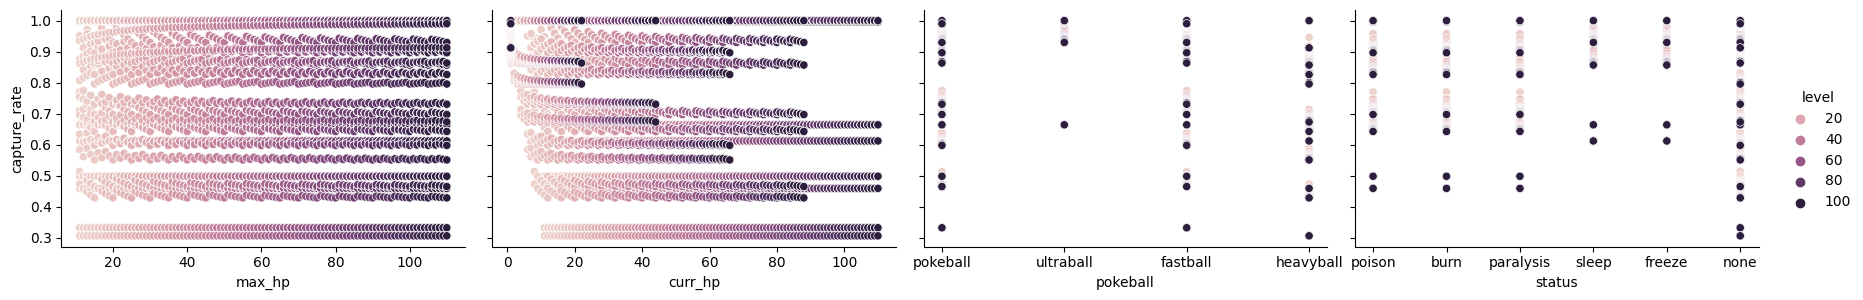

In [33]:
# Se crea un gráfico de dispersión que muestra las relaciones entre cinco variables diferentes.
# El resultado será un gráfico que muestra la relación 
# entre la tasa de captura y las variables de "max_hp", "curr_hp", "pokeball", "status", diferenciando por el "level".

sns.pairplot(df, x_vars=["max_hp", "curr_hp", "pokeball", "status"], y_vars=["capture_rate"], hue="level", height=3, aspect=1.5)
plt.show()